In [12]:
from bs4 import BeautifulSoup
import urllib.request               
from time import sleep
from datetime import datetime
import pandas as pd
import requests
import re
from datetime import date
#importind required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
def getweather():
    weather = []
    url = "https://weather.com/en-IN/weather/today/l/0fcc6b573ec19677819071ea104e175b6dfc8f942f59554bc99d10c5cd0dbfe8"
    day = date.today().day
    weather.append(day)
    month = date.today().month
    weather.append(month)
    year = date.today().year
    weather.append(year)
    
    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    temp = soup.find("div",{"class":"today_nowcard-temp"}).text[:-1]

    time = soup.find("p",{"class":"today_nowcard-timestamp"}).text[6:]
    weather.append(time)
    weather.append(temp)
    condition = soup.find("div",class_="today_nowcard-phrase").text
    weather.append(condition)
    high = soup.find_all("span",class_="deg-hilo-nowcard")[0].text[:-1]

    low = soup.find_all("span",class_="deg-hilo-nowcard")[1].text[:-1]
    weather.append(high)
    weather.append(low)
    rightnow = soup.find("div",class_="today_nowcard-sidecar component panel").find("table")

    wind = rightnow.find_all("tr")[0].find("span").text
    weather.append(wind)
    Humidity = rightnow.find_all("tr")[1].find("span").text[:-1]
    weather.append(Humidity)
    dew = rightnow.find_all("tr")[2].find("span").text[:-1]
    weather.append(dew)
    pressure = rightnow.find_all("tr")[3].find("span").text[:-3]
    pressure = pressure.replace(',', '')
    weather.append(pressure)
    visibility = rightnow.find_all("tr")[4].find("span").text
    weather.append(visibility)
    if(int(temp)>=30):
        heat = "YES"
    else:
        heat = "NO"
    weather.append(heat)
    if(int(Humidity)>=80):
        wet = "YES"
    else:
        wet = "NO"
    weather.append(wet)
    print("Day : ",day)
    print("Month : ",month)
    print("Year : ",year)
    print("Time : ",time)
    print("Temperature : ",temp)
    print("Condition : ",condition)
    print("High/Low : {}/{}".format(high,low))
    print("Wind : ",wind)
    print("Humidity : ",Humidity)
    print("Dew Point : ",dew)
    print("Pressure : ",pressure)
    print("Visibility : ",visibility)
    print("Heat : ",heat)
    print("Wet : ",wet)
    return weather

In [14]:
getweather()

Day :  12
Month :  8
Year :  2019
Time :  10:22 HKT
Temperature :  29
Condition :  Partly Cloudy
High/Low : 29/25
Wind :  WSW 14 km/h 
Humidity :  76
Dew Point :  24
Pressure :  1002.7 
Visibility :  12.9 km
Heat :  NO
Wet :  NO


[12,
 8,
 2019,
 '10:22 HKT',
 '29',
 'Partly Cloudy',
 '29',
 '25',
 'WSW 14 km/h ',
 '76',
 '24',
 '1002.7 ',
 '12.9 km',
 'NO',
 'NO']

In [15]:
import csv
import openpyxl
import sys

def main():
    print("Collecting  Weather Data in a intervals of 30 mins")
    idx = 0
    weatherdata = {'Day':[],'Month':[],'Year':[],'mean_temp':[],'max_temp':[],'min_temp':[],'meanhum':[],'meandew':[],'pressure':[],'heat':[],'wet':[]}
    filename = 'data.xlsx'
    wb = openpyxl.load_workbook(filename=filename)
    sheet = wb['Sheet1']
    #new_row = ['Day','Month','Year','mean_temp','max_temp','min_temp','meanhum','meandew','pressure','heat','wet']
    #sheet.append(new_row)
    while idx < 1:
        print('collecting weather data '+str(idx))
        tmp = getweather()
        weatherdata['Day'].append(tmp[0])
        weatherdata['Month'].append(tmp[1])
        weatherdata['Year'].append(tmp[2])
        weatherdata['mean_temp'].append(tmp[4])
        weatherdata['max_temp'].append(tmp[6])
        weatherdata['min_temp'].append(tmp[7])
        weatherdata['meanhum'].append(tmp[9])
        weatherdata['meandew'].append(tmp[10])
        weatherdata['pressure'].append(tmp[11])
        weatherdata['heat'].append(tmp[13])
        weatherdata['wet'].append(tmp[14])
        
        try :
            new_row = [int(tmp[0]),int(tmp[1]),int(tmp[2]),float(tmp[4]),float(tmp[6]),float(tmp[7]),float(tmp[9]),float(tmp[10]),float(tmp[11]),tmp[13],tmp[14]]
            sheet.append(new_row)
        except ValueError as e:
            print (e)
        idx+=1
    wb.save(filename)
    
    print(weatherdata)

In [16]:
main()

collecting weather data 0
Day :  12
Month :  8
Year :  2019
Time :  10:22 HKT
Temperature :  29
Condition :  Partly Cloudy
High/Low : 29/25
Wind :  WSW 14 km/h 
Humidity :  76
Dew Point :  24
Pressure :  1002.7 
Visibility :  12.9 km
Heat :  NO
Wet :  NO
{'Day': [12], 'Month': [8], 'Year': [2019], 'mean_temp': ['29'], 'max_temp': ['29'], 'min_temp': ['25'], 'meanhum': ['76'], 'meandew': ['24'], 'pressure': ['1002.7 '], 'heat': ['NO'], 'wet': ['NO']}


In [17]:
import pandas as pd
data_xls = pd.read_excel('data.xlsx', 'Sheet1', index_col=None)
data_xls.to_csv('data.csv', encoding='utf-8', index=False)

In [18]:
#importing classes to handle data,to split data into training and testing sets,to visualising of tree and to cheak accuracy of our model
from preprocessing import splitter
from preprocessing import Encoder
from preprocessing import scaler
from metrics import matrix
from treeVis import vis
sp=splitter()
mt=matrix()
vs=vis()
sc=scaler()
en=Encoder()

In [39]:
#importing dataset
dataset=pd.read_csv("data.csv")
dataset.tail()

Day  Month  Year  mean_temp  max_temp  min_temp  meanhum  meandew  \
623    4      8  2019       27.9      30.2      26.9       83     24.6   
624    5      8  2019       29.7      34.5      26.5       77     25.0   
625    6      8  2019       29.8      32.2      28.7       78     25.4   
626    7      8  2019       30.1      33.6      28.0       70     23.8   
627    8      8  2019       30.4      33.5      27.7       74     25.1   

     pressure heat  wet  
623    1002.7   NO  YES  
624    1003.1   NO   NO  
625    1002.7   NO   NO  
626    1000.7  YES   NO  
627     998.5  YES   NO

In [20]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
dataset.iloc[:,0]=lab.fit_transform(dataset.iloc[:,0])
dataset.iloc[:,1]=lab.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,2]=lab.fit_transform(dataset.iloc[:,2])
dataset.iloc[:,3]=lab.fit_transform(dataset.iloc[:,3])
dataset.iloc[:,4]=lab.fit_transform(dataset.iloc[:,4])
dataset.iloc[:,5]=lab.fit_transform(dataset.iloc[:,5])
dataset.iloc[:,6]=lab.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,7]=lab.fit_transform(dataset.iloc[:,7])
dataset.iloc[:,8]=lab.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,9]=lab.fit_transform(dataset.iloc[:,9])
dataset.iloc[:,10]=lab.fit_transform(dataset.iloc[:,10])

dataset.tail()

Day  Month  Year  mean_temp  max_temp  min_temp  meanhum  meandew  \
625    5      0    20         46        58        52       17       26   
626    6      0    20         49        72        45        9       10   
627    7      0    20         52        71        42       13       23   
628   11      0    20         38        26        15       15       12   
629   11      0    20         38        26        15       15       12   

     pressure  heat  wet  
625        68     0    0  
626        48     1    0  
627        29     1    0  
628        68     0    0  
629        68     0    0

In [21]:
#deviding data into dependant and independant sets
x = dataset[['Day','Month','Year']]
y = dataset['heat']
z = dataset['wet']

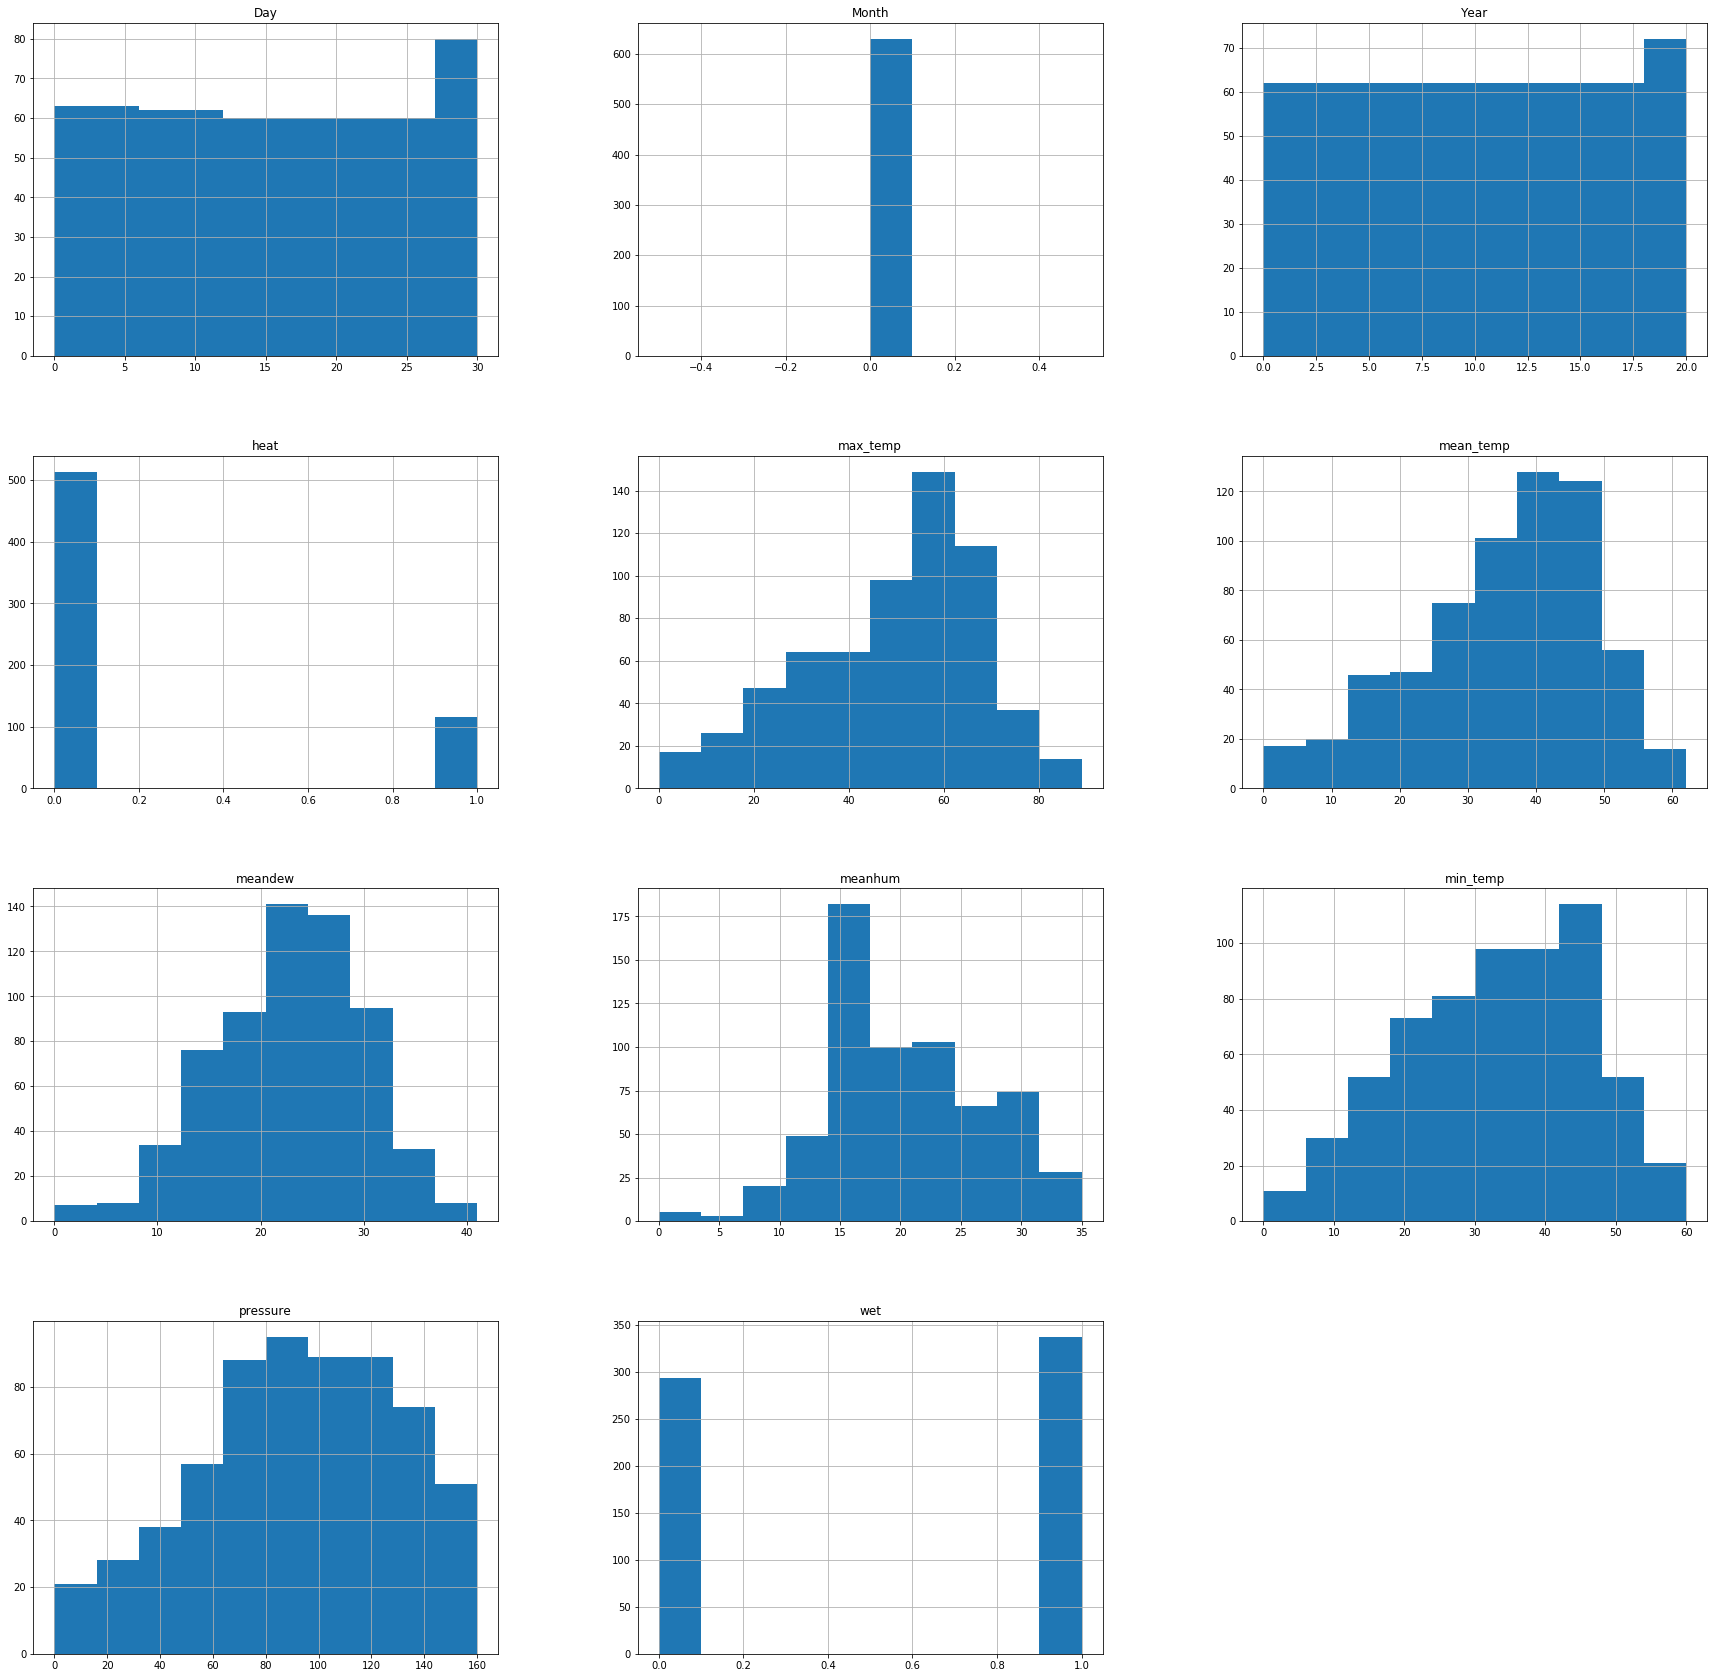

In [22]:
#visualising each attribute of dataset using histogram
dataset.hist(figsize = (30, 30))
plt.savefig("dataset.png")
plt.show()

In [23]:
#deviding data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.20,random_state=42)

In [24]:
#importing decision tree model and fitting training data to it
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x,y)

classifier_z=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_z.fit(x,z)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
#predicting values for x_test and compairing result with y_test
print("Heat:-")
y_pred=classifier.predict(x_test)
print("predicted values:-")
print(y_pred.astype(int))
y_test_arr=np.array(y_test)
print("original values:-")
print(y_test_arr)

#predicting values for x_test and compairing result with y_test
print("Wet:-")
z_pred=classifier_z.predict(x_test)
print("predicted values:-")
print(z_pred.astype(int))
z_test_arr=np.array(z_test)
print("original values:-")
print(z_test_arr)

Heat:-
predicted values:-
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
original values:-
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Wet:-
predicted values:-
[0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1]
original values:-
[0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 

In [26]:
#cheaking accuracy of our model
accuracy=mt.accuracy(y_pred,y_test)
print("{}%".format(accuracy*100))

accuracy=mt.accuracy(z_pred,z_test)
print("{}%".format(accuracy*100))

100.0%
100.0%


In [27]:

import os
 
os.environ["PATH"] += os.pathsep + 'graphviz-2.38/release/bin'

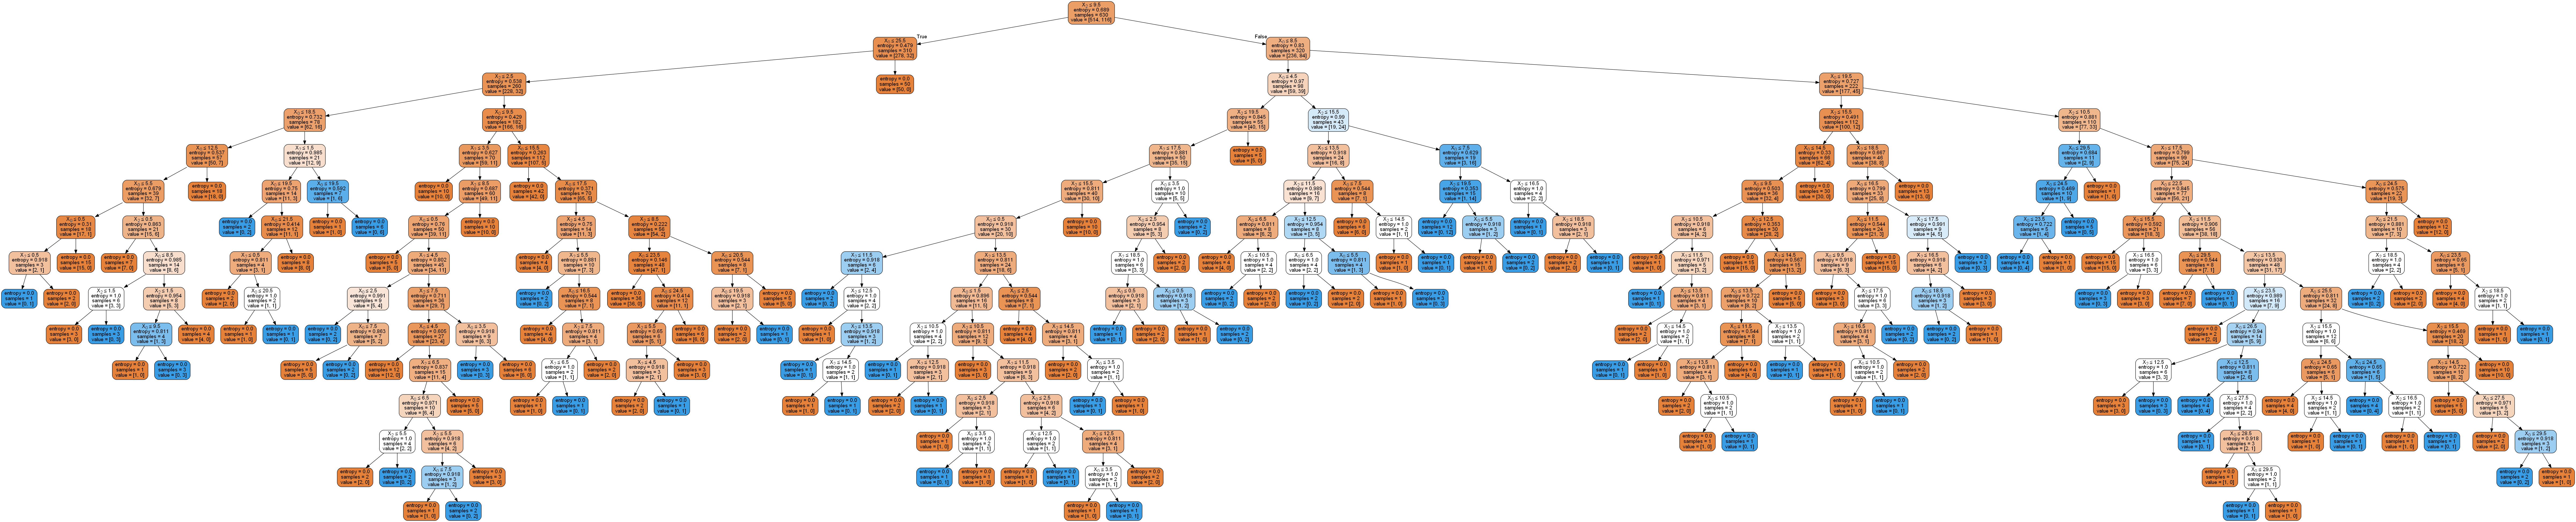

In [28]:
#tree visualisation

vs.dtree_visual(classifier)

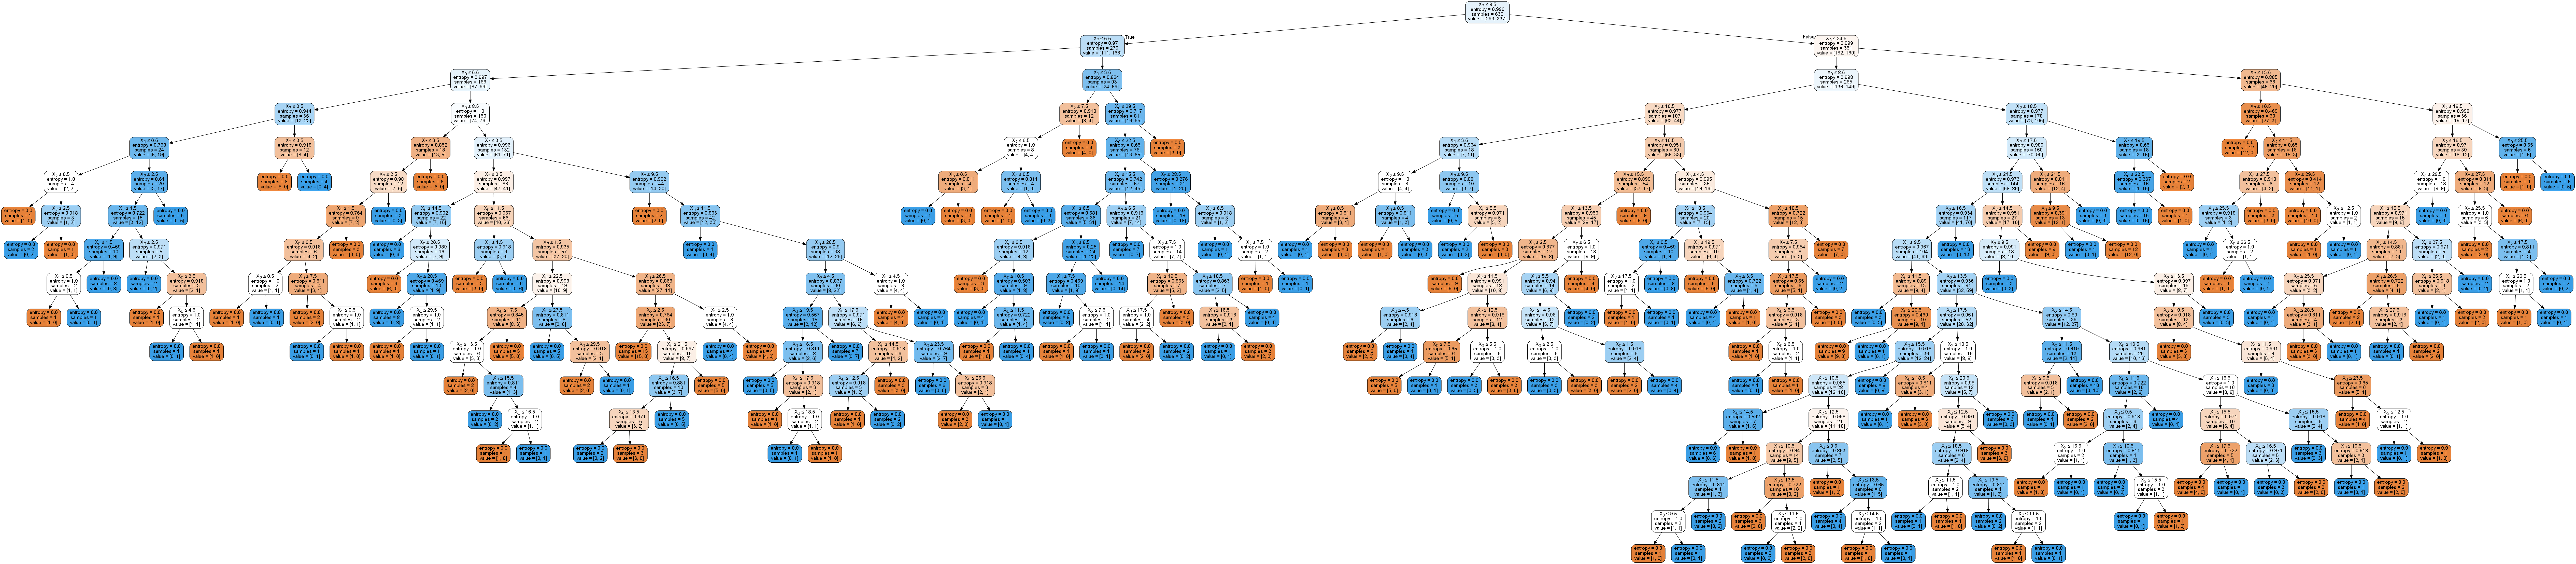

In [29]:
#tree visualisation

vs.dtree_visual(classifier_z)

In [30]:
from datetime import date
now = date.today()
filepath = "prediction/forecast-"+str(now)+".xlsx"
def prediction():
    wb = openpyxl.Workbook()
    wb.save(filepath)
    print("Predict Weather Data ")
    idx = 0
    weatherdata = {'Day':[],'Month':[],'Year':[],'heat':[],'wet':[]}
    filename = filepath
    wb = openpyxl.load_workbook(filename=filename)
    sheet = wb['Sheet']
    new_row = ['Day','Month','Year','Heat','Wet']
    sheet.append(new_row)
    while idx < 31:
        print('Predict weather data '+str(idx))
        year = date.today().year
        yr = year - 1999
        if(date.today().day==31):
            year +=1
            yr +=1
        y_pred=classifier.predict([[idx,0,yr]])
        print(y_pred.astype(int))
        z_pred=classifier_z.predict([[idx,0,yr]])
        print(z_pred.astype(int))
        tmp_d = idx+1
        tmp_m = 8
        tmp_y = year
        tmp_h = y_pred.astype(int)
        tmp_w = z_pred.astype(int)
        if(int(tmp_h)==0):
            tmp_h_char = "NO"
        else:
            tmp_h_char = "YES"
        if(int(tmp_w)==0):
            tmp_w_char = "NO"
        else:
            tmp_w_char = "YES"    
        new_row = [int(tmp_d),int(tmp_m),int(tmp_y),tmp_h_char,tmp_w_char]
        sheet.append(new_row)
        idx+=1
    wb.save(filename)
    
    print(weatherdata)

In [31]:
prediction()

Predict Weather Data 
Predict weather data 0
[0]
[1]
Predict weather data 1
[0]
[1]
Predict weather data 2
[0]
[1]
Predict weather data 3
[0]
[1]
Predict weather data 4
[0]
[0]
Predict weather data 5
[0]
[0]
Predict weather data 6
[1]
[0]
Predict weather data 7
[1]
[0]
Predict weather data 8
[1]
[0]
Predict weather data 9
[0]
[0]
Predict weather data 10
[0]
[0]
Predict weather data 11
[0]
[0]
Predict weather data 12
[0]
[0]
Predict weather data 13
[0]
[0]
Predict weather data 14
[0]
[0]
Predict weather data 15
[0]
[0]
Predict weather data 16
[0]
[0]
Predict weather data 17
[0]
[0]
Predict weather data 18
[0]
[0]
Predict weather data 19
[0]
[0]
Predict weather data 20
[0]
[0]
Predict weather data 21
[0]
[0]
Predict weather data 22
[0]
[0]
Predict weather data 23
[0]
[0]
Predict weather data 24
[1]
[0]
Predict weather data 25
[0]
[0]
Predict weather data 26
[0]
[1]
Predict weather data 27
[0]
[1]
Predict weather data 28
[0]
[1]
Predict weather data 29
[0]
[1]
Predict weather data 30
[0]


In [32]:
data_xls = pd.read_excel(filepath, 'Sheet', index_col=None)
data_xls.to_csv("prediction/forecast-"+str(now)+".csv", encoding='utf-8', index=False)

In [33]:
#importing dataset
data_pred=pd.read_csv("prediction/forecast-"+str(now)+".csv")
data_pred

Day  Month  Year Heat  Wet
0     1      8  2019   NO  YES
1     2      8  2019   NO  YES
2     3      8  2019   NO  YES
3     4      8  2019   NO  YES
4     5      8  2019   NO   NO
5     6      8  2019   NO   NO
6     7      8  2019  YES   NO
7     8      8  2019  YES   NO
8     9      8  2019  YES   NO
9    10      8  2019   NO   NO
10   11      8  2019   NO   NO
11   12      8  2019   NO   NO
12   13      8  2019   NO   NO
13   14      8  2019   NO   NO
14   15      8  2019   NO   NO
15   16      8  2019   NO   NO
16   17      8  2019   NO   NO
17   18      8  2019   NO   NO
18   19      8  2019   NO   NO
19   20      8  2019   NO   NO
20   21      8  2019   NO   NO
21   22      8  2019   NO   NO
22   23      8  2019   NO   NO
23   24      8  2019   NO   NO
24   25      8  2019  YES   NO
25   26      8  2019   NO   NO
26   27      8  2019   NO  YES
27   28      8  2019   NO  YES
28   29      8  2019   NO  YES
29   30      8  2019   NO  YES
30   31      8  2019   NO  YES

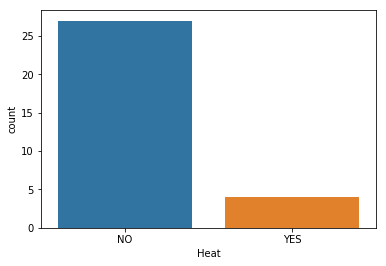

In [34]:
import seaborn as sns
sns_plot = sns.countplot(x='Heat',data=data_pred)
fig = sns_plot.get_figure()
fig.savefig("prediction/heat_summary_prediction-"+str(now)+".png")

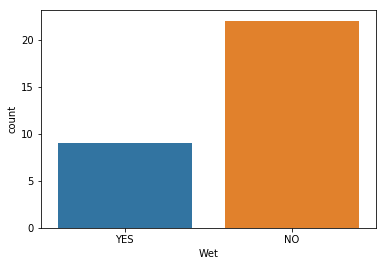

In [35]:
sns_plot =sns.countplot(x='Wet',data=data_pred)
fig = sns_plot.get_figure()
fig.savefig("prediction/wet_summary_prediction-"+str(now)+".png")